<a href="https://colab.research.google.com/github/wtliu1/ECON441B/blob/main/Week_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WENTAO LIU 206085049**

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B_W/week8/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
df.isna().sum()

age                              0
duration                         0
y                                0
loan_unknown                     0
loan_yes                         0
                                ..
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
education_unknown                0
Length: 83, dtype: int64

In [9]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [10]:
df.describe()

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,0.024036,0.151695,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,...,0.099568,0.017432,0.013839,0.055647,0.146766,0.231014,0.000437,0.127294,0.295426,0.042027
std,10.42125,259.279249,0.153163,0.358729,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,...,0.299427,0.130877,0.116824,0.229242,0.353877,0.421486,0.020901,0.333306,0.456239,0.200653
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.00000,4918.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


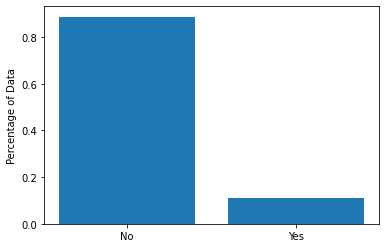

In [11]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [12]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
X_scaled.shape

(28831, 82)

In [14]:
X_test.shape

(12357, 82)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [15]:
df.columns

Index(['age', 'duration', 'y', 'loan_unknown', 'loan_yes', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_unknown', 'housing_yes',
       'contact_telephone', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'campaign_2', 'campaign_3',
       'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7', 'campaign_8',
       'campaign_9', 'campaign_10', 'campaign_11', 'campaign_12',
       'campaign_13', 'campaign_14', 'campaign_15', 'campaign_16',
       'campaign_17', 'campaign_18', 'campaign_19', 'campaign_20',
       'campaign_21', 'campaign_22', 'campaign_23', 'campaign_24',
       'campaign_25', 'campaign_26', 'campaign_27', 'campaign_28',
       'campaign_29', 'campaign_30', 'campaign_31', 'campaign_32',
       'campai

In [16]:
###############
###TRANSFORM###
###############

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42) 
X_scaled, y_train = ros.fit_resample(X_scaled, y_train) 
X_test, y_test = ros.fit_resample(X_test, y_test)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [17]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.032\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.393\ngini = 0.378\nsamples = 24129\nvalue = [18034, 6095]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.242\nsamples = 14091\nvalue = [12106, 1985]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.216\nsamples = 13675\nvalue = [11987, 1688]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.408\nsamples = 416\nvalue = [119, 297]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.36\ngini = 0.484\nsamples = 10038\nvalue = [5928, 4110]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 7406\nvalue = [3642, 3764]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.228\nsamples = 2632\nvalue = [2286, 346]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.025\ngini = 0.402\nsamples = 27031\nvalue = [7546, 19485]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.482\nsamples = 14318\nvalue = [5807, 8511]\nclass = Ye

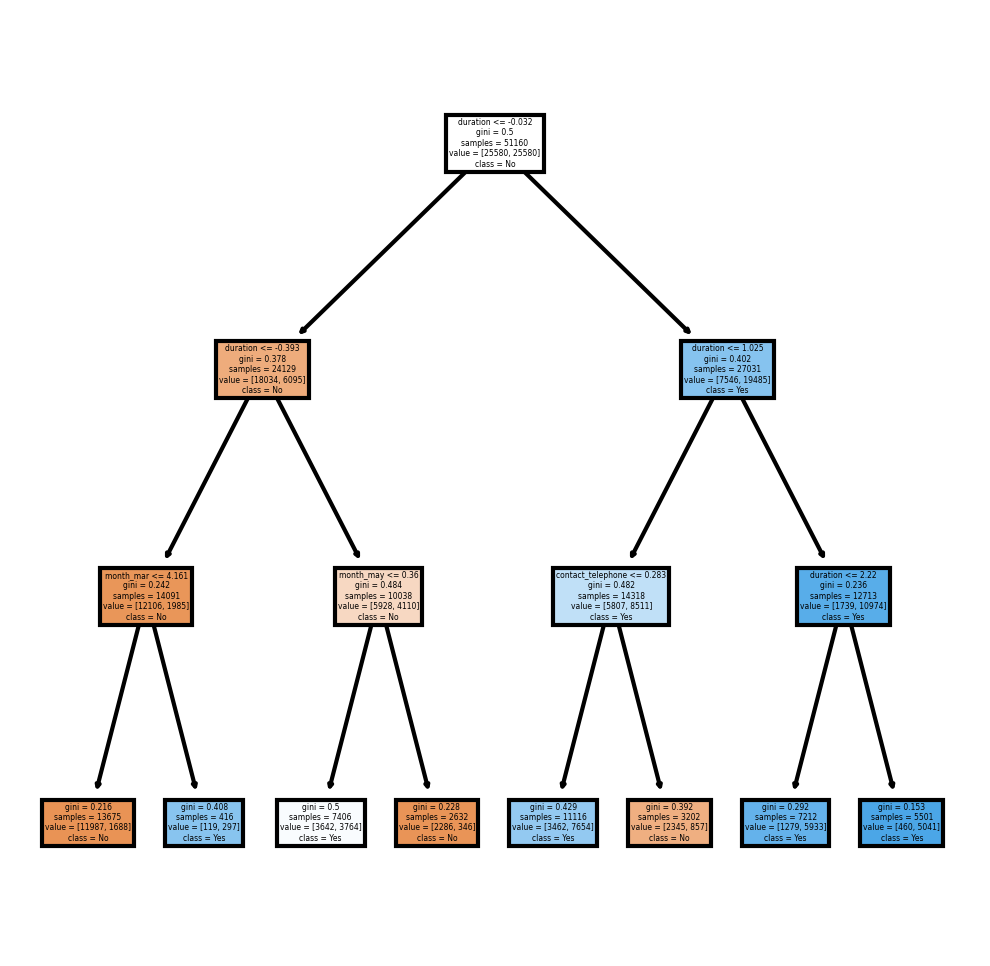

In [18]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [19]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

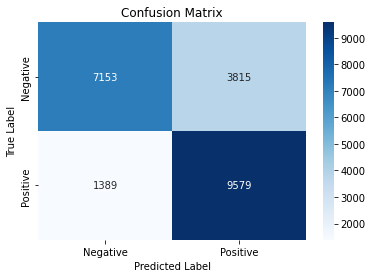

In [20]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [21]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7714259664478483


In [22]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

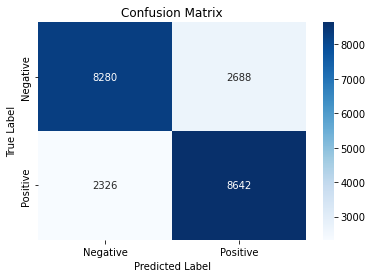

In [23]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [26]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

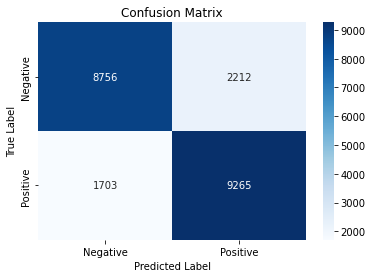

In [27]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [33]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 5.5 MB/s eta 0:00:00


In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [42]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(), 
    RandomForestClassifier(), 
    AdaBoostClassifier(), 
    KNeighborsClassifier(5)
]

super_learner = SuperLearner(folds = 10, random_state = 42)
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
### TRAIN YOUR METALEARNER

In [43]:
log_reg = LogisticRegression(fit_intercept=False).fit(base_predictions, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [44]:
log_reg.coef_

array([[-3.58043579, -4.19776847, -2.98417256, 17.79183476]])

From the output above, we find that the coeff of first, second, and third term are negative, and the fourth is positive. Thus, we should increase the weight of KNN.

In [45]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_pred = log_reg.predict(super_learner.predict(X_test))
cm_superlearner = confusion_matrix(y_test, y_pred)

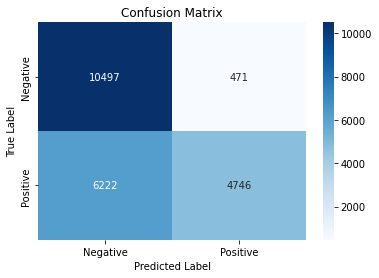

In [47]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap 
sns.heatmap(cm_superlearner, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix') 
plt.xlabel('Predicted Label') 
plt.ylabel('True Label') 
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [51]:
from sklearn.metrics import confusion_matrix

# compute confusion matrix for decision tree model
tn, fp, fn, tp = cm_raw.ravel()
sensitivity_tree = tp / (tp + fn)
specificity_tree = tn / (tn + fp)

# compute confusion matrix for bagged model
tn, fp, fn, tp = cm_bag.ravel()
sensitivity_bagging = tp / (tp + fn)
specificity_bagging = tn / (tn + fp)

# compute confusion matrix for boosted model
tn, fp, fn, tp = cm_boost.ravel()
sensitivity_boosting = tp / (tp + fn)
specificity_boosting = tn / (tn + fp)

# compute confusion matrix for super learner model
tn, fp, fn, tp = cm_superlearner.ravel()
sensitivity_ensemble = tp / (tp + fn)
specificity_ensemble = tn / (tn + fp)


<Figure size 864x576 with 0 Axes>

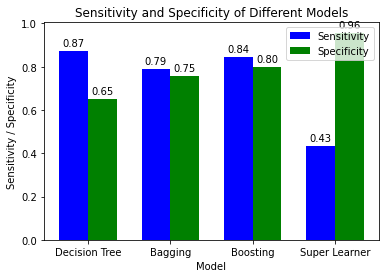

In [56]:
import matplotlib.pyplot as plt

# define data
sensitivity = [sensitivity_tree, sensitivity_bagging, sensitivity_boosting, sensitivity_ensemble]
specificity = [specificity_tree, specificity_bagging, specificity_boosting, specificity_ensemble]
labels = ['Decision Tree', 'Bagging', 'Boosting', 'Super Learner']

# plot bar chart
plt.figure(figsize = (12, 8))
x = range(len(labels))
bar_width = 0.35
fig, ax = plt.subplots()
sensitivity_bars = ax.bar(x, sensitivity, width=bar_width, color='b', label='Sensitivity')
specificity_bars = ax.bar([i + bar_width for i in x], specificity, width=bar_width, color='g', label='Specificity')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# add labels to bars
for bar in sensitivity_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
for bar in specificity_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# add axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Sensitivity / Specificity')
ax.set_title('Sensitivity and Specificity of Different Models')

# display plot
plt.show()
